In [27]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import time
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential

from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
import keras
 
def build_sequence(sequence, n_steps):
    X_lst, y_lst = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X_lst.append(seq_x)
        y_lst.append(seq_y)
    X,y=array(X_lst), array(y_lst)
    row = int(round(0.7 * len(X))) # 70% split

    X_train = X[:row]            
    y_train = y[:row]  
    X_test = X[row:]
    y_test = y[row:]  
    return array(X_train), array(y_train),array(X_test), array(y_test)
 
# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290]
n_steps = 6
X_train, y_train,X_test, y_test = build_sequence(raw_seq, n_steps)


n_features = 1
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
model = Sequential()
d = 0.3
decay=0.2

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X_train, y_train, epochs=4000, verbose=0)
x_input = array([230,240,250,260,270,280])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))
predicted = model.predict(X_test, verbose=0)

[[301.72192]]


In [28]:
predicted

array([[231.0566 ],
       [242.18445],
       [253.95947],
       [265.84964],
       [277.7838 ],
       [289.74014],
       [301.7219 ]], dtype=float32)

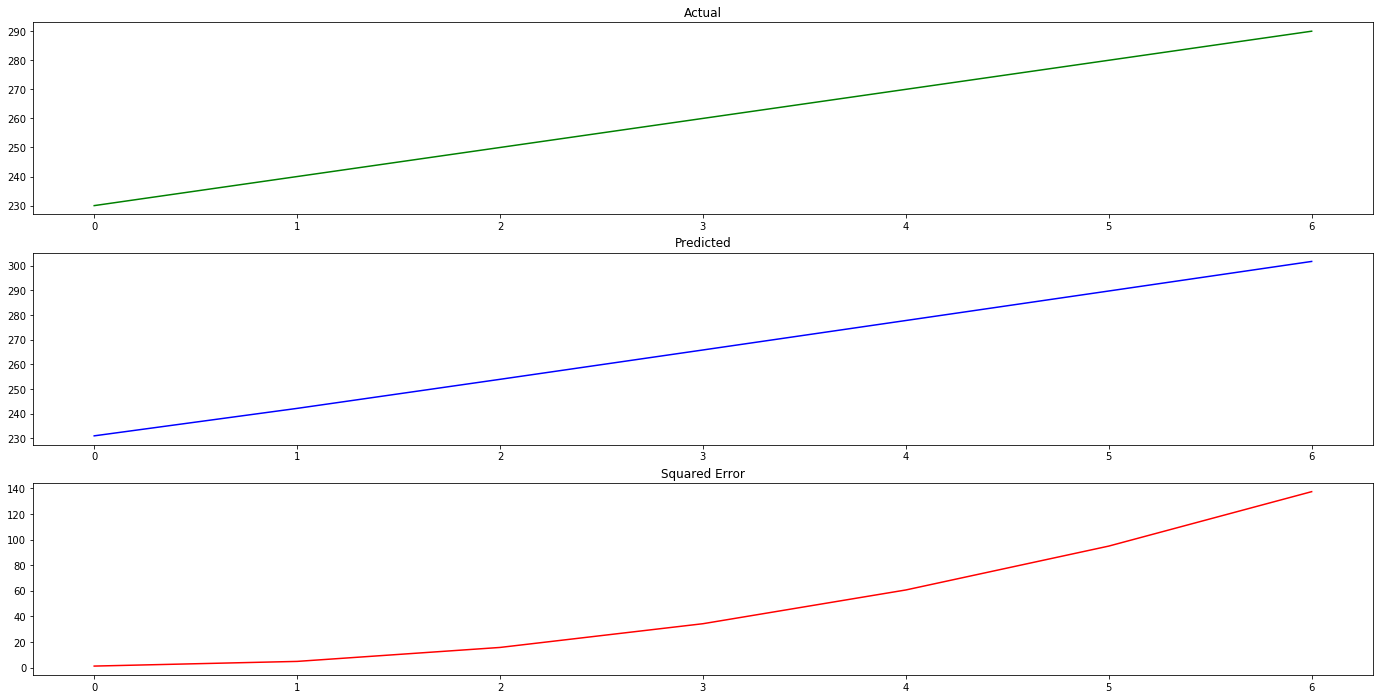

In [29]:
predicted = np.reshape(predicted, (predicted.size,))

fig = plt.gcf()
fig.set_size_inches(24, 12)
plt.figure(1)
plt.subplot(311)
plt.title("Actual")
plt.plot(y_test, 'g')
plt.subplot(312)
plt.title("Predicted")
plt.plot(predicted, 'b')
plt.subplot(313)
plt.title("Squared Error")
mse = ((y_test - predicted)**2 )
plt.plot(mse, 'r')
plt.show()